In [1]:
import pandas as pd
import random
from faker import Faker
import numpy as np

# Initialize Faker and other settings
fake = Faker()
random.seed(42)
num_rows = 10000

# Generate ID and Vehicle ID
id = [random.randint(1, 5) for _ in range(num_rows)]
vehicle_Id = [f"VI{str(i).zfill(5)}" for i in range(1, num_rows + 1)]

# Generate Battery Level and correlated Range values
B_levels = [random.randint(15, 100) for _ in range(num_rows)]
range_values = []
for battery in B_levels:
    correlated_range = 20 + ((battery - 15) / 80) * 300  # Adjusted scaling factor
    range_with_noise = correlated_range + random.uniform(-5, 5)  # More noise
    range_values.append(round(range_with_noise, 2))

# Generate Latitudes and Longitudes (could be more region-specific)
latitudes = [round(random.uniform(10.00, 20.00), 4) for _ in range(num_rows)]
longitudes = [round(random.uniform(76.00, 80.00), 4) for _ in range(num_rows)]

# Generate Vehicle Dimensions with realistic correlations
length = [random.randint(2500, 5500) for _ in range(num_rows)]
wheel_base = [int(l * random.uniform(0.4, 0.6)) for l in length]  # Wheelbase correlated with length
width = [int(l * random.uniform(0.25, 0.4)) for l in length]  # Width correlated with length
height = [int(w * random.uniform(0.5, 0.8)) for w in width]  # Height correlated with width

# Generate Speed and Top Speed (Top Speed correlated with Battery Level)
speed = [random.randint(30, 150) for _ in range(num_rows)]
top_speed = [int(70 + (battery / 100) * 130) for battery in B_levels]  # Higher battery level supports higher top speed

# Generate Vehicle Status with some correlation to Battery Level
vehicle_status = [1 if battery > 20 else 0 for battery in B_levels]  # 0 for inactive if battery is low

# Generate other attributes
charge_time = [fake.time() for _ in range(num_rows)]
mc = [int((300 + (100 - battery) * 20) * random.uniform(0.8, 1.2)) for battery in B_levels]  # Maintenance cost higher for low battery levels
cc = [random.randint(10, 100) for _ in range(num_rows)]
max_payload = [random.randint(400, 1500) for _ in range(num_rows)]
seats = [random.randint(4, 7) for _ in range(num_rows)]

# Compile data into a DataFrame
df = pd.DataFrame({
    'id': id,
    'Vehicle Id': vehicle_Id,
    'Range (km)': range_values,
    'Battery Level (%)': B_levels,
    'Latitude (N)': latitudes,
    'Longitude (E)': longitudes,
    'Wheel Base (mm)': wheel_base,
    'Speed (km/h)': speed,
    'Length (mm)': length,
    'Width (mm)': width,
    'Height (mm)': height,
    'Top Speed': top_speed,
    'Vehicle Status': vehicle_status,
    'Charge Time': charge_time,
    'Maintenance Cost': mc,
    'Charge Cost': cc,
    'Max Payload (kgs)': max_payload,
    'Seats': seats
})

#print(df.head(10))


In [2]:
from datetime import date
def generate_random_dates(num_dates):
  fake=Faker()
  Dates=[]
  start_date=date(2024,1,1)
  end_date=date(2024,10,31)
  for _ in range(num_dates):
    random_date=fake.date_between(start_date=start_date,end_date=end_date)
    formatted_date=random_date.strftime("%d-%m-%y")
    Dates.append(formatted_date)
  return Dates
num_dates = 10000
random_dates = generate_random_dates(num_dates)
print(type(random_dates))
# for date in random_dates:
#   print(date)
df['Dates']=random_dates
df['Day']=df['Dates'].str[0:2]
df['Month']=df['Dates'].str[3:5]
df['Year']=df['Dates'].str[6:]



<class 'list'>


In [3]:
df.head()

,id,Vehicle Id,Range (km),Battery Level (%),Latitude (N),Longitude (E),Wheel Base (mm),Speed (km/h),Length (mm),Width (mm),...,Vehicle Status,Charge Time,Maintenance Cost,Charge Cost,Max Payload (kgs),Seats,Dates,Day,Month,Year
0,1,VI00001,296.52,89,15.7453,78.3460,1670,76,2921,962,...,1,22:57:02,430,75,1247,5,29-07-24,29,07,24
1,1,VI00002,136.40,45,18.3095,79.9976,2488,99,4279,1157,...,1,19:42:16,1167,59,955,6,29-04-24,29,04,24
2,3,VI00003,253.10,76,14.7494,77.4169,1490,118,2959,861,...,1,19:44:44,910,47,595,7,23-03-24,23,03,24
3,2,VI00004,253.07,77,11.4656,76.4427,1845,95,3708,1407,...,1,10:16:55,889,12,1489,7,22-09-24,22,09,24
4,2,VI00005,69.13,27,12.3105,77.7619,2777,64,5391,1878,...,1,22:59:28,2031,91,430,6,04-06-24,04,06,24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   Vehicle Id         10000 non-null  object 
 2   Range (km)         10000 non-null  float64
 3   Battery Level (%)  10000 non-null  int64  
 4   Latitude (N)       10000 non-null  float64
 5   Longitude (E)      10000 non-null  float64
 6   Wheel Base (mm)    10000 non-null  int64  
 7   Speed (km/h)       10000 non-null  int64  
 8   Length (mm)        10000 non-null  int64  
 9   Width (mm)         10000 non-null  int64  
 10  Height (mm)        10000 non-null  int64  
 11  Top Speed          10000 non-null  int64  
 12  Vehicle Status     10000 non-null  int64  
 13  Charge Time        10000 non-null  object 
 14  Maintenance Cost   10000 non-null  int64  
 15  Charge Cost        10000 non-null  int64  
 16  Max Payload (kgs)  1000

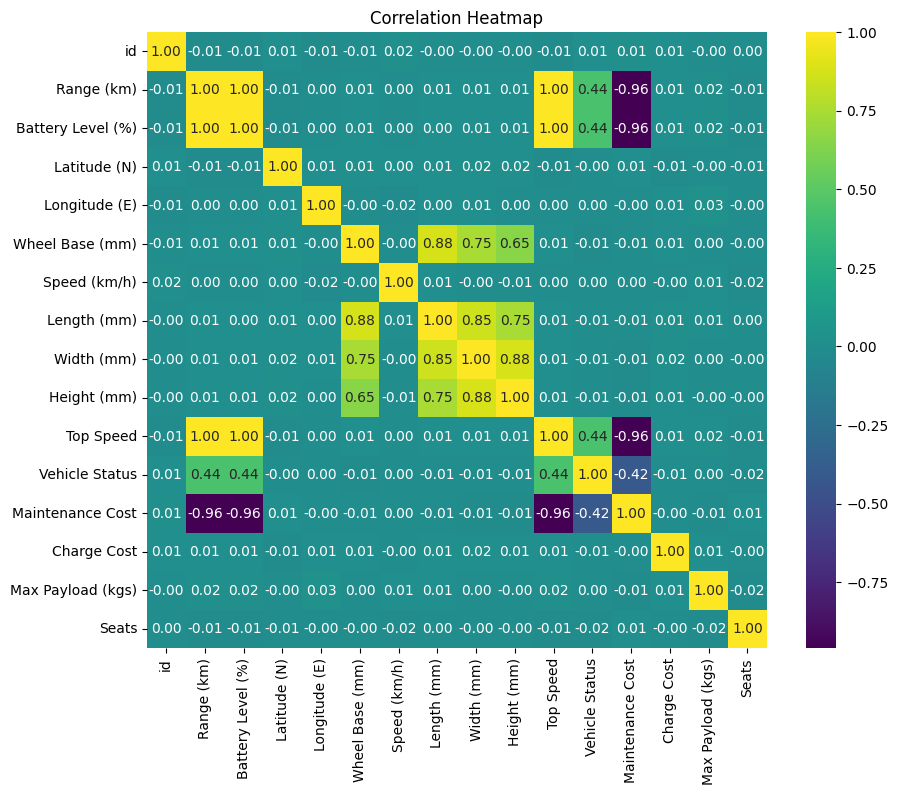

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Correlation of Variables

#     Battery Level (%) ↔ Range (km) ------ > Positive 

#     Speed (km/h) ↔ Top Speed (km/h) ------> Positive


#     Range (km) ↔ Vehicle Status (Active) ----- > Positive 


#     Battery Level (%) ↔ Charge Time (hrs) ----->  Negative


#     Range (km) ↔ Maintenance Cost (₹) --->  Positive 

#     Speed (km/h) ↔ Maintenance Cost (₹)----> Positive

#     Length (mm), Width (mm) ↔ Max Payload (kg) ----> Positive 

#     Battery Level (%) ↔ Charge Cost (₹)---> Negative


In [7]:
# # Create pairplot to visualize relationships between selected variables
# sns.pairplot(numerical_cols, kind='scatter', markers='o', plot_kws={'alpha':0.5})
# plt.suptitle('Pairplot of Numerical Variables', y=1.02)
# plt.show()


In [8]:
df.describe()

,id,Range (km),Battery Level (%),Latitude (N),Longitude (E),Wheel Base (mm),Speed (km/h),Length (mm),Width (mm),Height (mm),Top Speed,Vehicle Status,Maintenance Cost,Charge Cost,Max Payload (kgs),Seats
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.013500,178.619573,57.305600,15.038345,78.001064,2004.224300,89.96190,4007.033900,1299.120400,845.263900,144.048400,0.930200,1151.734400,54.681100,950.790000,5.508800
std,1.412911,92.942963,24.770324,2.884895,1.151891,493.842392,34.76392,866.671458,332.306422,246.861124,32.204524,0.254822,513.850108,26.181619,316.415326,1.119575
min,1.000000,15.010000,15.000000,10.002200,76.000300,1013.000000,30.00000,2500.000000,630.000000,331.000000,89.000000,0.000000,244.000000,10.000000,400.000000,4.000000
25%,2.000000,97.450000,36.000000,12.562550,77.012650,1612.000000,60.00000,3257.000000,1034.000000,658.750000,116.000000,1.000000,717.750000,32.000000,679.000000,5.000000
50%,3.000000,178.070000,57.000000,15.041050,78.007700,1980.000000,90.00000,4002.500000,1278.000000,815.000000,144.000000,1.000000,1133.000000,54.000000,947.000000,6.000000
75%,4.000000,258.920000,79.000000,17.534525,78.993000,2357.000000,120.00000,4766.000000,1533.000000,1006.000000,172.000000,1.000000,1566.000000,77.000000,1222.000000,7.000000
max,5.000000,343.630000,100.000000,19.997700,80.000000,3297.000000,150.00000,5500.000000,2179.000000,1711.000000,200.000000,1.000000,2393.000000,100.000000,1500.000000,7.000000


In [9]:
df.to_csv("data.csv")

In [10]:
df.tail(10)

,id,Vehicle Id,Range (km),Battery Level (%),Latitude (N),Longitude (E),Wheel Base (mm),Speed (km/h),Length (mm),Width (mm),...,Vehicle Status,Charge Time,Maintenance Cost,Charge Cost,Max Payload (kgs),Seats,Dates,Day,Month,Year
9990,2,VI09991,248.60,76,17.5844,79.1165,1513,80,2680,970,...,1,22:52:51,885,61,1183,4,04-01-24,04,01,24
9991,1,VI09992,19.10,15,11.7777,76.4681,1922,106,3762,1157,...,0,07:16:41,2186,38,1364,5,16-04-24,16,04,24
9992,3,VI09993,147.45,49,10.0579,79.2827,1245,115,2929,849,...,1,18:36:32,1558,67,1178,4,05-06-24,05,06,24
9993,1,VI09994,187.68,61,17.8300,78.5527,2246,58,3758,1285,...,1,05:47:47,1276,17,709,5,12-02-24,12,02,24
9994,4,VI09995,84.49,31,15.0765,77.3781,2007,143,4545,1759,...,1,17:43:24,1518,96,1418,7,29-03-24,29,03,24
9995,1,VI09996,130.29,45,16.7147,79.5081,1745,107,2927,1108,...,1,23:53:15,1591,15,1071,7,04-06-24,04,06,24
9996,3,VI09997,266.77,80,15.4887,77.8122,1909,99,3566,1178,...,1,19:18:59,814,44,1117,4,07-05-24,07,05,24
9997,1,VI09998,268.44,82,13.5654,77.3395,1441,131,2525,788,...,1,00:53:33,628,98,939,7,17-07-24,17,07,24
9998,3,VI09999,290.99,86,16.5358,79.1970,3017,122,5284,1478,...,1,08:29:20,498,43,1147,6,15-09-24,15,09,24
9999,1,VI10000,187.34,59,10.4756,77.0420,2749,46,4598,1596,...,1,11:06:53,1105,100,1156,5,08-07-24,08,07,24


In [11]:
df1=pd.read_csv("/home/res/Desktop/internship/PROJECTS/vehicles.csv")

In [12]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5 non-null      int64  
 1   Make                         5 non-null      object 
 2   Driver                       5 non-null      object 
 3   mgr                          5 non-null      object 
 4   Acceleration 0-100 km/h      5 non-null      float64
 5   Top speed                    5 non-null      int64  
 6   ER                           5 non-null      int64  
 7   Total Power                  5 non-null      int64  
 8   Total Torque                 5 non-null      int64  
 9   Drive                        5 non-null      object 
 10  BC                           5 non-null      int64  
 11  Length                       5 non-null      int64  
 12  Width                        5 non-null      int64  
 13  Height                  

,id,Make,Driver,mgr,Acceleration 0-100 km/h,Top speed,ER,Total Power,Total Torque,Drive,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,82,4694,1849,1443,2875,2232,388,561,5
1,2,BMW,samiksha,Satish,3.3,261,460,377,660,AWD,82,4694,1849,1443,2875,2232,388,561,5
2,3,Hyundai,praneetha,Oliver,5.7,190,470,250,430,Rear,83,4783,1852,1448,2856,2605,555,470,5
3,4,Volkswagen,sahithya,Tarun Dhull,7.9,160,450,150,310,Rear,82,4261,1802,1568,2771,2300,447,385,5
4,5,Polestar,santhi,Mathew,7.4,160,425,170,330,Front,78,4607,1800,1479,2735,2490,496,405,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   Vehicle Id         10000 non-null  object 
 2   Range (km)         10000 non-null  float64
 3   Battery Level (%)  10000 non-null  int64  
 4   Latitude (N)       10000 non-null  float64
 5   Longitude (E)      10000 non-null  float64
 6   Wheel Base (mm)    10000 non-null  int64  
 7   Speed (km/h)       10000 non-null  int64  
 8   Length (mm)        10000 non-null  int64  
 9   Width (mm)         10000 non-null  int64  
 10  Height (mm)        10000 non-null  int64  
 11  Top Speed          10000 non-null  int64  
 12  Vehicle Status     10000 non-null  int64  
 13  Charge Time        10000 non-null  object 
 14  Maintenance Cost   10000 non-null  int64  
 15  Charge Cost        10000 non-null  int64  
 16  Max Payload (kgs)  1000

In [14]:
result=pd.merge(df1,df, on="id")

In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10000 non-null  int64  
 1   Make                         10000 non-null  object 
 2   Driver                       10000 non-null  object 
 3   mgr                          10000 non-null  object 
 4   Acceleration 0-100 km/h      10000 non-null  float64
 5   Top speed                    10000 non-null  int64  
 6   ER                           10000 non-null  int64  
 7   Total Power                  10000 non-null  int64  
 8   Total Torque                 10000 non-null  int64  
 9   Drive                        10000 non-null  object 
 10  BC                           10000 non-null  int64  
 11  Length                       10000 non-null  int64  
 12  Width                        10000 non-null  int64  
 13  Height           

In [16]:
result.head(10)

,id,Make,Driver,mgr,Acceleration 0-100 km/h,Top speed,ER,Total Power,Total Torque,Drive,...,Vehicle Status,Charge Time,Maintenance Cost,Charge Cost,Max Payload (kgs),Seats_y,Dates,Day,Month,Year
0,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,22:57:02,430,75,1247,5,29-07-24,29,07,24
1,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,19:42:16,1167,59,955,6,29-04-24,29,04,24
2,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,00:58:16,1874,37,544,4,03-04-24,03,04,24
3,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,0,06:29:53,2370,30,1184,6,03-02-24,03,02,24
4,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,0,00:19:45,2025,89,745,4,29-06-24,29,06,24
5,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,12:15:43,1865,28,599,5,06-07-24,06,07,24
6,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,21:24:38,1670,64,614,7,24-05-24,24,05,24
7,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,09:04:14,611,30,523,4,11-03-24,11,03,24
8,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,04:23:17,988,38,504,7,19-02-24,19,02,24
9,1,Tesla 1,chandu,Elon musk,4.4,233,485,366,493,AWD,...,1,18:13:29,1653,58,849,4,23-01-24,23,01,24


In [17]:
result.groupby(['Make']).count()

,id,Driver,mgr,Acceleration 0-100 km/h,Top speed,ER,Total Power,Total Torque,Drive,BC,...,Vehicle Status,Charge Time,Maintenance Cost,Charge Cost,Max Payload (kgs),Seats_y,Dates,Day,Month,Year
Make,,,,,,,,,,,,,,,,,,,,,
BMW,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,...,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985
Hyundai,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,...,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968
Polestar,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
Tesla 1,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976,...,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976
Volkswagen,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,...,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070


In [23]:
result.to_csv("DSmerge.csv")####in project displayed this file with name data.csv

In [24]:
result.shape

(10000, 40)

In [25]:
result.describe()

,id,Acceleration 0-100 km/h,Top speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Speed (km/h),Length (mm),Width (mm),Height (mm),Top Speed,Vehicle Status,Maintenance Cost,Charge Cost,Max Payload (kgs),Seats_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.013500,5.762290,200.377300,457.834500,261.423100,443.25380,81.396400,4604.475500,1830.056500,1477.06260,...,89.96190,4007.033900,1299.120400,845.263900,144.048400,0.930200,1151.734400,54.681100,950.790000,5.508800
std,1.412911,1.747541,40.309615,20.108544,95.297288,126.85689,1.741944,184.044516,24.097223,48.35905,...,34.76392,866.671458,332.306422,246.861124,32.204524,0.254822,513.850108,26.181619,316.415326,1.119575
min,1.000000,3.300000,160.000000,425.000000,150.000000,310.00000,78.000000,4261.000000,1800.000000,1443.00000,...,30.00000,2500.000000,630.000000,331.000000,89.000000,0.000000,244.000000,10.000000,400.000000,4.000000
25%,2.000000,4.400000,160.000000,450.000000,170.000000,330.00000,82.000000,4607.000000,1802.000000,1443.00000,...,60.00000,3257.000000,1034.000000,658.750000,116.000000,1.000000,717.750000,32.000000,679.000000,5.000000
50%,3.000000,5.700000,190.000000,460.000000,250.000000,430.00000,82.000000,4694.000000,1849.000000,1448.00000,...,90.00000,4002.500000,1278.000000,815.000000,144.000000,1.000000,1133.000000,54.000000,947.000000,6.000000
75%,4.000000,7.400000,233.000000,470.000000,366.000000,493.00000,82.000000,4694.000000,1849.000000,1479.00000,...,120.00000,4766.000000,1533.000000,1006.000000,172.000000,1.000000,1566.000000,77.000000,1222.000000,7.000000
max,5.000000,7.900000,261.000000,485.000000,377.000000,660.00000,83.000000,4783.000000,1852.000000,1568.00000,...,150.00000,5500.000000,2179.000000,1711.000000,200.000000,1.000000,2393.000000,100.000000,1500.000000,7.000000


In [26]:
result['Make'].unique()

array(['Tesla 1', 'BMW', 'Hyundai', 'Volkswagen', 'Polestar'],
      dtype=object)

In [27]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10000 non-null  int64  
 1   Make                         10000 non-null  object 
 2   Driver                       10000 non-null  object 
 3   mgr                          10000 non-null  object 
 4   Acceleration 0-100 km/h      10000 non-null  float64
 5   Top speed                    10000 non-null  int64  
 6   ER                           10000 non-null  int64  
 7   Total Power                  10000 non-null  int64  
 8   Total Torque                 10000 non-null  int64  
 9   Drive                        10000 non-null  object 
 10  BC                           10000 non-null  int64  
 11  Length                       10000 non-null  int64  
 12  Width                        10000 non-null  int64  
 13  Height           

In [28]:
dff=result
dff['Range']=dff['Range (km)'].apply(lambda x : x*1.20 if x<160 else x*0.75)

In [29]:
result.shape

(10000, 41)

In [30]:
dff.shape

(10000, 41)

In [31]:
result.to_csv('sam.csv')
dff.to_csv("manip_raw.csv")

In [32]:
#######

In [33]:
###################prediction model in EVrangePREDICTIONmodel.ipynb